In [ ]:
import pyhessio

In [1]:
from ctapipe.utils.datasets import get_path
from ctapipe.io.hessio import hessio_event_source
from ctapipe import visualization, io
from matplotlib import pyplot as plt
from astropy import units as u
from ctapipe.visualization import CameraDisplay
from ctapipe.io import CameraGeometry
import numpy as np
import math
%matplotlib inline

In [2]:
source = hessio_event_source(get_path("/Users/Jason/Software/outputs/sim_telarray/meudon_gamma/simtel_runmeudon_gamma_30tel_30deg_1.gz"), max_events=100)

In [22]:
event = next(source)
tels = list(event.dl0.tels_with_data)
tels

[24, 25, 18, 30]

In [23]:
event.dl0.event_id

406

In [24]:
teldata = event.dl0.tel[tels[0]]
img = teldata.adc_samples[0]
maxpix = np.unravel_index(np.argmax(img),img.shape)
maxT = maxpix[1]

In [25]:
img

array([[41, 42, 40, ..., 36, 39, 35],
       [37, 34, 33, ..., 42, 40, 43],
       [29, 25, 25, ..., 37, 40, 33],
       ..., 
       [37, 42, 42, ..., 33, 27, 34],
       [32, 36, 36, ..., 36, 39, 34],
       [30, 31, 31, ..., 45, 44, 40]], dtype=uint16)

In [26]:
print(event.mc)

MCEvent:
energy:   3.1 TeV
altitude: 1.0 rad
azimuth:  6.3 rad
core x:   -96.56 m
core y:   -365.4 m
total photo_electrons: 110


In [27]:
event.mc.tel
event.dl0.tel[2].adc_samples[0].shape

KeyError: 2

In [28]:
npix = 0
npix = np.sum([np.sum(t.photo_electrons > 0) for t in event.mc.tel.values()])
#for t in event.mc.tel.values():
 #   npix += np.sum(t.photo_electrons > 0)
print(npix)

110


In [29]:
"""
b = event.mcevent.tel[tels[0]].pe_count
N = max(b)+1
Qt = np.zeros(N)
for key in b:
    Qt[key] = b[key]
    """
Qt = event.mc.tel[tels[0]].photo_electrons

In [30]:
np.sum(Qt > 0)

28

In [31]:
event.mc

ctapipe.io.containers.MCEvent("MCEvent", alt, tel, core_x, energy, h_first_int, core_y, az)

In [32]:
img = teldata.adc_samples[0]
maxarr = np.unravel_index(np.argmax(img),img.shape)
maxT = maxarr[1]

In [33]:
maxarr

(1190, 25)

In [34]:
winlen = 20
t = img[:,np.arange(maxT - math.floor(winlen/2),maxT + math.floor(winlen/2))]
Qm = t.sum(axis=1)

In [35]:
event.mc.energy

<Quantity 3.0660221576690674 TeV>

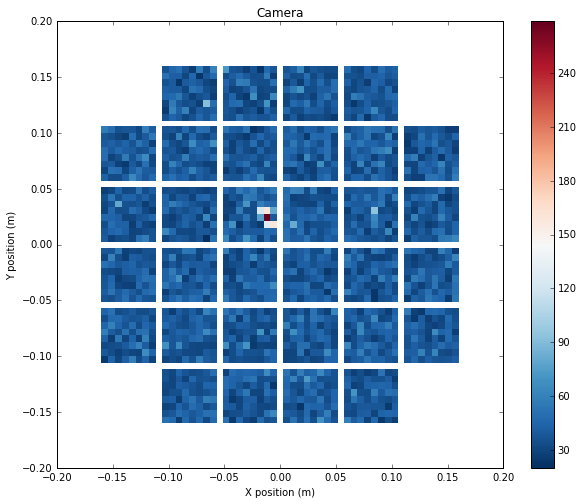

In [36]:
#plt.rcParams['figure.figsize'] = (10.0, 8.0)
geom = CameraGeometry.guess(*event.meta.pixel_pos[tels[0]], event.meta.optical_foclen[tels[0]])
disp = CameraDisplay(geom)
disp.image = img[:,maxarr[1]]
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)  # autoscale

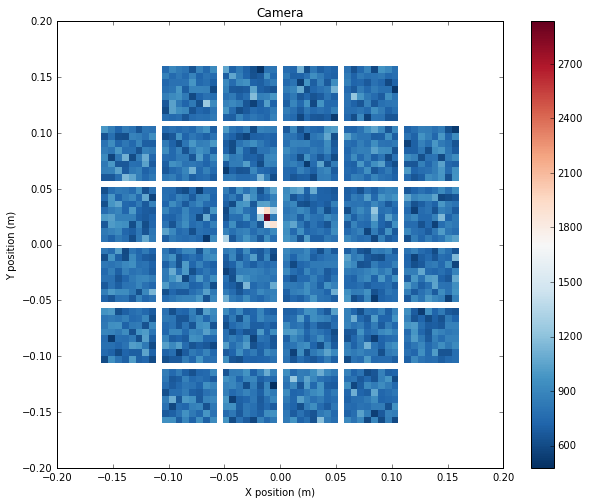

In [37]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
geom = CameraGeometry.guess(*event.meta.pixel_pos[tels[0]], event.meta.optical_foclen[tels[0]])
disp = CameraDisplay(geom)
disp.image = Qm
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)  # autoscale

matplotlib.figure.Figure

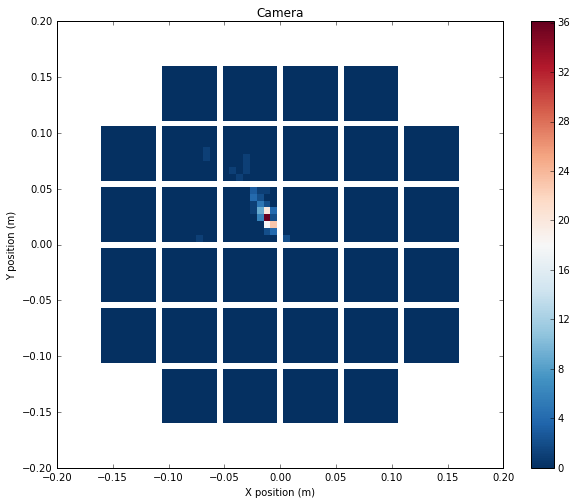

In [38]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
geom = CameraGeometry.guess(*event.meta.pixel_pos[tels[0]], event.meta.optical_foclen[tels[0]])
disp = CameraDisplay(geom)
disp.image = Qt
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)  # autoscale
axd = disp.axes.figure
type(axd)

In [19]:
type(disp)

ctapipe.visualization.mpl.CameraDisplay

In [20]:
event.dl0.event_id

207

In [ ]:
import numpy as np, copy
import matplotlib.pyplot as plt, matplotlib.lines as ml

fig=plt.figure(1)
data=np.arange(0,10,0.01)
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

#create the lines
line1=ml.Line2D(data,data)
line2=ml.Line2D(data,data**2/10,ls='--',color='green')
line3=ml.Line2D(data,np.sin(data),color='red')
#add the copies of the lines to the first 3 panels
ax1.add_line(copy.copy(line1))
ax2.add_line(copy.copy(line2))
ax3.add_line(copy.copy(line3))

[ax4.add_line(_l) for _l in [line1,line2,line3]] # add 3 lines to the 4th panel

[_a.autoscale() for _a in [ax1,ax2,ax3,ax4]] # autoscale if needed
plt.draw()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(16, 6)) 
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1]) 
ax0 = plt.subplot(gs[0])
ax0.plot(x, y)
ax1 = plt.subplot(gs[2])
ax1.plot(y, x)
ax2 = plt.subplot(gs[0:,-1])
disp = CameraDisplay(geom)
disp.image = Qt
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)  # autoscale



plt.tight_layout()
plt.savefig('grid_figure.pdf')

In [ ]:
event.dl0.event_id

In [ ]:
event = next(source)
event.count

In [ ]:
data = img
flatten_sorted = data.flatten().argsort()[:][::-1]
flatten_sorted

In [ ]:
pixels_max = np.unravel_index(flatten_sorted, data.shape)[0]
pixels_max

In [ ]:
pixels_max_sortedunique, pixels_max_sortedunique_ind = np.unique(pixels_max, return_index=True)
pixels_max_sortedunique
pixels_max[np.argsort(pixels_max_sortedunique_ind)]

In [ ]:
pixels_max_sortedunique_ind

In [ ]:
pixels_max_sortedunique_ind[np.argsort(pixels_max_sortedunique_ind)]

In [ ]:
pixels_max_sortedunique_ind.sort()
pixels_max_sortedunique_ind

In [ ]:
pixels_max[pixels_max_sortedunique_ind[np.argsort(pixels_max_sortedunique_ind)]]

In [ ]:
sort, ind = np.unique(pixels_sorted, return_index=True)
a[np.argsort(ind)]